In [705]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt

## Initialize Dataset

In [706]:
np.random.seed(14)

In [707]:
n_samples = 400
std_dev = 1.5

Y_mean = (6.5, 5.5)
N_mean = (3.0,2.0)

In [708]:
def generate_dataset(mean, std_dev):
    np.random.seed(14)
    x_axis = np.random.normal(loc=mean[0], scale=std_dev, size=int(n_samples/2))
    y_axis = np.random.normal(loc=mean[1], scale=std_dev, size=int(n_samples/2))
    return np.transpose((x_axis, y_axis))

In [709]:
Y_data = generate_dataset(Y_mean, std_dev)
N_data = generate_dataset(N_mean, std_dev)

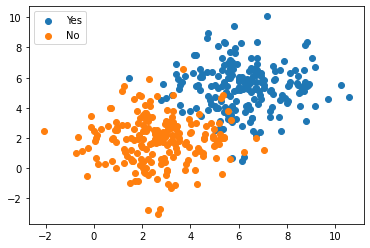

In [710]:
plt.scatter(Y_data[:,0], Y_data[:,1])
plt.scatter(N_data[:,0], N_data[:,1])
plt.legend(['Yes', 'No'])

In [711]:
Y_data = np.append(Y_data, np.ones((200,1)), axis=1)
N_data = np.append(N_data, np.zeros((200,1)), axis=1)

data = np.concatenate([Y_data, N_data])

In [712]:
print(data.shape)
print()
print(data[:5])
print()
print(data[-5:])

(400, 3)

[[8.82700867 8.38049208 1.        ]
 [6.61877904 4.5680135  1.        ]
 [6.76096479 8.34096156 1.        ]
 [6.39149515 4.18470989 1.        ]
 [3.4935059  5.93503598 1.        ]]

[[3.54191414 2.31483602 0.        ]
 [0.90956773 3.06165266 0.        ]
 [3.06859276 2.5918089  0.        ]
 [3.01753821 1.53954429 0.        ]
 [2.32080406 1.61804941 0.        ]]


**last column is the label**

## Split Train and Test Set

In [713]:
np.random.seed(14)
np.random.shuffle(data)

In [714]:
data[:10]

array([[ 3.64896198,  5.69586821,  1.        ],
       [ 4.74181731,  4.76673602,  1.        ],
       [ 6.61877904,  4.5680135 ,  1.        ],
       [ 0.0797832 ,  2.01743968,  0.        ],
       [ 3.23575753,  3.00722843,  1.        ],
       [ 5.73293541,  3.05106684,  1.        ],
       [ 5.03170394,  1.54092955,  0.        ],
       [ 3.5797832 ,  5.51743968,  1.        ],
       [ 7.42915277,  6.79353612,  1.        ],
       [ 5.2919024 , -0.39438921,  0.        ]])

In [715]:
train_ratio = 0.7

train_data = data[:int(0.7*n_samples)]
test_data = data[int(-0.3*n_samples):]

print(f'shape for X_train: {train_data.shape}')
print(f'shape for X_test: {test_data.shape}')

shape for X_train: (280, 3)
shape for X_test: (120, 3)


## Creating Model

- activation function: sigmoid
- loss function: sum of squared

In [716]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

sigmoid_v = np.vectorize(sigmoid)

In [717]:
def apply_threshold(x, threshold=0.5):
    if x >= threshold:
        return 1.0
    else:
        return 0.0
    
apply_threshold_v = np.vectorize(apply_threshold)  

## Stochastic Gradient Descent v1

In [728]:
def stochastic_gradient_descent(data, alpha=0.01, iteration=2000, theshold=0.5):
    # [1, x1, x2]
    data = np.append(np.ones((len(data),1)), data, axis=1)
    # [bias, theta1, theta2]
    np.random.seed(14)
    thetas = np.random.rand(len(data[0])-1)
    
    loss_history = []
    accuracy_history = []
    thetas_history = []
    
    X = data[:,:3]
    y = data[:,-1]
    
    for current_iteration in range(iteration):
        sum_loss = 0.0
        sum_accuracy = []
        
        #select random sample
        i = np.random.randint(0, len(X))
        hx = sigmoid(np.dot(X[i], thetas.T))
        thetas = thetas - np.multiply(X[i], alpha*(2*(hx - y[i])*hx*(1 - hx)))
        
        # this loop is only to calculate the losses and accuracy
        for i in range(len(data)):
            hx = sigmoid(np.dot(X[i], thetas.T))
            sum_loss += (hx-y[i])**2
            predicted_y = apply_threshold(hx)
            sum_accuracy.append(predicted_y == y[i])
        
        
        accuracy = sum_accuracy.count(True)/len(X)
        if current_iteration % 200 == 0:
            print(f'Epoch: {current_iteration}')
            print(f'    losses: {sum_loss}')
            print(f'    accuracy: {accuracy}')
        
        thetas_history.append(thetas)
        loss_history.append(sum_loss)
        accuracy_history.append(accuracy)
        
    return loss_history, accuracy_history, thetas_history

In [729]:
loss_history, accuracy_history, thetas_history = stochastic_gradient_descent(train_data, alpha=0.1)

Epoch: 0
    losses: 125.07397745228585
    accuracy: 0.5178571428571429
Epoch: 200
    losses: 55.89601506445915
    accuracy: 0.6964285714285714
Epoch: 400
    losses: 36.06931346444312
    accuracy: 0.7964285714285714
Epoch: 600
    losses: 27.2381039041105
    accuracy: 0.9071428571428571
Epoch: 800
    losses: 29.534766753899238
    accuracy: 0.8464285714285714
Epoch: 1000
    losses: 35.638915997400545
    accuracy: 0.8107142857142857
Epoch: 1200
    losses: 20.7937430868341
    accuracy: 0.9392857142857143
Epoch: 1400
    losses: 19.263865236070032
    accuracy: 0.9214285714285714
Epoch: 1600
    losses: 19.411043843427006
    accuracy: 0.9142857142857143
Epoch: 1800
    losses: 40.73390027367273
    accuracy: 0.7857142857142857


Text(0, 0.5, 'Sum of Squared Error')

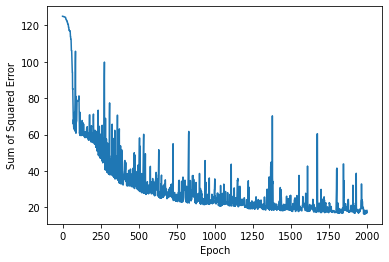

In [732]:
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Sum of Squared Error')

Text(0, 0.5, 'Accuracy')

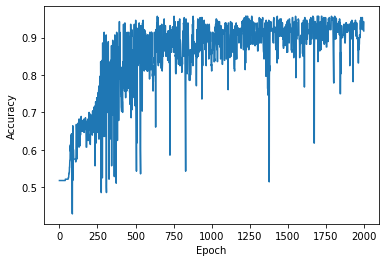

In [733]:
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

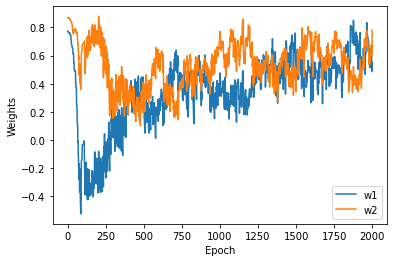

In [734]:
thetas_history = np.array(thetas_history)
plt.plot(thetas_history[:, 1:])
plt.xlabel('Epoch')
plt.ylabel('Weights')
plt.legend(['w1', 'w2'])

## Stochastic Gradient Descent v2

In [450]:
def online_stochastic_gradient_descent(data, alpha=0.01, epoch=100, theshold=0.5):
    # [1, x1, x2]
    data = np.append(np.ones((len(data),1)), data, axis=1)
    # [bias, theta1, theta2]
    np.random.seed(14)
    thetas = np.random.rand(len(data[0])-1)
    
    loss_history = []
    accuracy_history = []
    thetas_history = []
    
    for current_epoch in range(epoch):
        sum_loss = 0.0
        sum_accuracy = []
        
        #shuffle to prevent cycles
        np.random.seed(14)
        np.random.shuffle(data)
        X = data[:,:3]
        y = data[:,-1]
        
        for i in range(len(data)):
            hx = sigmoid(np.dot(X[i], thetas.T))
            thetas = thetas - np.multiply(X[i], alpha*(2*(hx - y[i])*hx*(1 - hx)))
            
            sum_loss += (hx-y[i])**2
            predicted_y = apply_threshold(hx)
            sum_accuracy.append(predicted_y == y[i])
            
        accuracy = sum_accuracy.count(True)/len(X)
        print(f'Epoch: {current_epoch}')
        print(f'    losses: {sum_loss}')
        print(f'    accuracy: {accuracy}')
        
        thetas_history.append(thetas)
        loss_history.append(sum_loss)
        accuracy_history.append(accuracy)
        
    return loss_history, accuracy_history, thetas_history

In [451]:
loss_history, accuracy_history, thetas_history = online_stochastic_gradient_descent(train_data)

Epoch: 0
    losses: 123.20887026960385
    accuracy: 0.5178571428571429
Epoch: 1
    losses: 114.52229699985233
    accuracy: 0.5214285714285715
Epoch: 2
    losses: 73.45585954219793
    accuracy: 0.5892857142857143
Epoch: 3
    losses: 57.231655022925004
    accuracy: 0.6535714285714286
Epoch: 4
    losses: 54.08582382201406
    accuracy: 0.6714285714285714
Epoch: 5
    losses: 50.618891788041445
    accuracy: 0.6964285714285714
Epoch: 6
    losses: 47.19135378609151
    accuracy: 0.75
Epoch: 7
    losses: 44.068281394234006
    accuracy: 0.7964285714285714
Epoch: 8
    losses: 42.06118210482242
    accuracy: 0.8035714285714286
Epoch: 9
    losses: 39.610368213938195
    accuracy: 0.8464285714285714
Epoch: 10
    losses: 38.072135539403796
    accuracy: 0.8607142857142858
Epoch: 11
    losses: 35.89968527621775
    accuracy: 0.8607142857142858
Epoch: 12
    losses: 34.615738601364306
    accuracy: 0.8785714285714286
Epoch: 13
    losses: 33.34176182089913
    accuracy: 0.89285714285

In [339]:
loss_history, accuracy_history, thetas_history = batch_gradient_descent(train_data)

Epoch: 0
    losses: 130.85661665414563
    accuracy: 0.49642857142857144
Epoch: 1
    losses: 123.01535163946437
    accuracy: 0.49642857142857144
Epoch: 2
    losses: 77.85064176718635
    accuracy: 0.5857142857142857
Epoch: 3
    losses: 57.43703919090382
    accuracy: 0.6857142857142857
Epoch: 4
    losses: 54.057351123368605
    accuracy: 0.7107142857142857
Epoch: 5
    losses: 51.132275734744745
    accuracy: 0.7142857142857143
Epoch: 6
    losses: 48.04692909807956
    accuracy: 0.7642857142857142
Epoch: 7
    losses: 46.1319491015973
    accuracy: 0.7714285714285715
Epoch: 8
    losses: 43.57518158712079
    accuracy: 0.7964285714285714
Epoch: 9
    losses: 42.028940314817355
    accuracy: 0.8107142857142857
Epoch: 10
    losses: 39.87059522844754
    accuracy: 0.8285714285714286
Epoch: 11
    losses: 38.17149000999186
    accuracy: 0.8535714285714285
Epoch: 12
    losses: 36.339661772809485
    accuracy: 0.8571428571428571
Epoch: 13
    losses: 35.04186165673503
    accuracy: 

Text(0, 0.5, 'Sum of Squared Error')

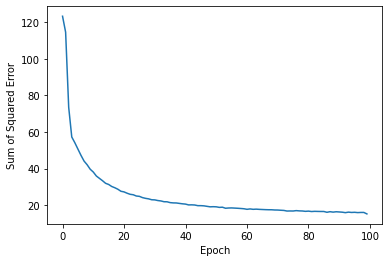

In [452]:
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Sum of Squared Error')

Text(0, 0.5, 'Accuracy')

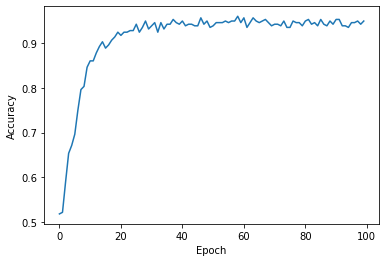

In [453]:
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

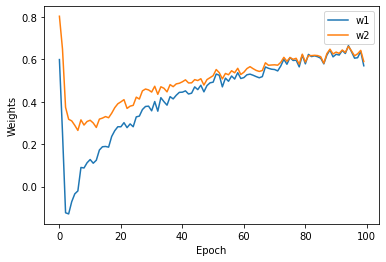

In [454]:
thetas_history = np.array(thetas_history)
plt.plot(thetas_history[:, 1:])
plt.xlabel('Epoch')
plt.ylabel('Weights')
plt.legend(['w1', 'w2'])

## Batch Gradient Descent

In [735]:
def batch_gradient_descent(data, alpha=0.01, epoch=100, theshold=0.5):
    # [1, x1, x2]
    data = np.append(np.ones((len(data),1)), data, axis=1)
    # [bias, theta1, theta2]
    np.random.seed(14)
    thetas = np.random.rand(len(data[0])-1)
    
    loss_history = []
    accuracy_history = []
    thetas_history = []
    for current_epoch in range(epoch):
        sum_loss = 0.0
        sum_accuracy = []
        
        #shuffle to prevent cycles
        np.random.seed(14)
        np.random.shuffle(data)
        X = data[:,:3]
        y = data[:,-1]
        hx = sigmoid_v(np.dot(X, thetas.T))
        sum_loss = ((hx-y)**2).sum()
        
        predicted_y = apply_threshold_v(hx)
        sum_accuracy = predicted_y == y
        thetas = thetas - alpha*np.sum(((2*(hx - y)*hx*(1 - hx)).reshape(-1, 1) * X), axis=0)

        accuracy = np.sum(sum_accuracy)/len(X)
        if current_epoch % 10 == 0:
            print(f'Epoch: {current_epoch}')
            print(f'    losses: {sum_loss}')
            print(f'    accuracy: {accuracy}')
        loss_history.append(sum_loss)
        accuracy_history.append(accuracy)
        thetas_history.append(thetas)

    return loss_history, accuracy_history, thetas_history

In [736]:
loss_history, accuracy_history, thetas_history = batch_gradient_descent(train_data, alpha=0.001, epoch=200)

Epoch: 0
    losses: 125.07397728961439
    accuracy: 0.5178571428571429
Epoch: 10
    losses: 120.73585886660794
    accuracy: 0.5214285714285715
Epoch: 20
    losses: 106.05953768260031
    accuracy: 0.5214285714285715
Epoch: 30
    losses: 59.17617043572122
    accuracy: 0.6464285714285715
Epoch: 40
    losses: 55.169838649380914
    accuracy: 0.6607142857142857
Epoch: 50
    losses: 51.455655049699544
    accuracy: 0.675
Epoch: 60
    losses: 48.10875629511857
    accuracy: 0.7107142857142857
Epoch: 70
    losses: 45.139486093581844
    accuracy: 0.7607142857142857
Epoch: 80
    losses: 42.52431767217003
    accuracy: 0.8
Epoch: 90
    losses: 40.22720970228521
    accuracy: 0.8392857142857143
Epoch: 100
    losses: 38.20946336199601
    accuracy: 0.85
Epoch: 110
    losses: 36.43392785681601
    accuracy: 0.8678571428571429
Epoch: 120
    losses: 34.866841238631324
    accuracy: 0.8785714285714286
Epoch: 130
    losses: 33.47851244314694
    accuracy: 0.9
Epoch: 140
    losses: 32

Text(0, 0.5, 'Sum of Squared Error')

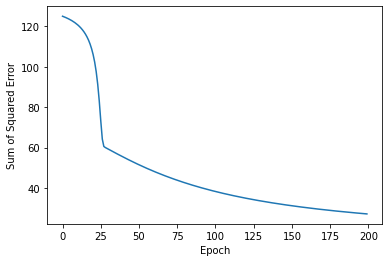

In [737]:
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Sum of Squared Error')

Text(0, 0.5, 'Accuracy')

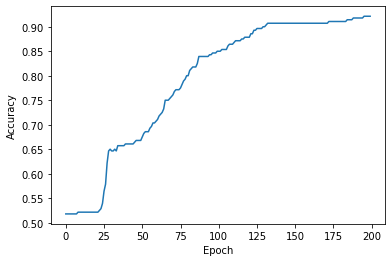

In [738]:
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

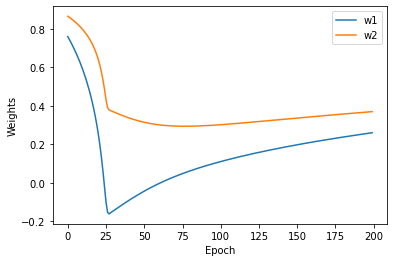

In [739]:
thetas_history = np.array(thetas_history)
plt.plot(thetas_history[:, 1:])
plt.xlabel('Epoch')
plt.ylabel('Weights')
plt.legend(['w1', 'w2'])